In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import nltk
import matplotlib
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [8]:
# 파일 불러오기
data = pd.read_csv('data/ky_naverblog_url.csv')
data

,title,url
0,2021 따릉이와 마실,https://blog.naver.com/ekgus0516/222303033992
1,"감사한 일상들과 찐웃음, 따릉이 뽕뽑몽",https://blog.naver.com/viinu/222294621441
2,"망원동 상실이네+411 바쁘다 바빠, 4월 첫날, 따릉이 과다 운행!",https://blog.naver.com/paple21/222302085908
3,따릉이 타다가 경찰서 간 썰 풉니다^^ 오랜만의 불행log,https://blog.naver.com/bluebluetoto/222305178377
4,자전거 출퇴근 시 사고! 산재처리 될까? 자전거 안전수칙부터 따릉이 이용방법 팁까지!,https://blog.naver.com/adtkorea77/222303833070
...,...,...
2307,[서울벚꽃명소] 벚꽃엔딩을 이곳에서. 허밍웨이길 피천득산책로 & 주변 맛집 Best...,https://blog.naver.com/iioiomijinjin/222298036699
2308,으랏차차 직장인의 우당탕탕 일상 16,https://blog.naver.com/jsj920329/222301145500
2309,거울보면서 이 포즈를 따라해 보세요,https://blog.naver.com/kimgain2/222295441824
2310,한국경제 매일경제 종이신문 주요뉴스 링크-21년4일8일(목),https://blog.naver.com/sunilee0324/222302537478


In [86]:
# title data 합치기 - '자전거', '따릉', '일상' 제거
message = ''
for item in data['title']:
    message = message + re.sub('[^\w]', ' ', item) +''
message = re.sub('자전거', '', message)
message = re.sub('따릉', '', message)
message = re.sub('일상', '', message)
# message

In [87]:
# 명사 추출
nlp = Okt()
message_N = nlp.nouns(message)
# message_N

In [109]:
# 단어 빈도 확인
count = Counter(message_N)
word_count = dict()

for tag, counts in count.most_common(100):
    if(len(str(tag))>1):
        word_count[tag] = counts
#         print("%s : %d" % (tag, counts))
        print(tag,':',counts)

벚꽃 : 157
서울 : 139
한강 : 106
공원 : 87
일기 : 72
맛집 : 63
카페 : 57
기록 : 57
후기 : 55
라이딩 : 46
추천 : 43
타고 : 42
여의도 : 42
운동 : 42
나들이 : 42
서울숲 : 40
구경 : 39
인치 : 34
하루 : 33
여행 : 33
방법 : 32
산책 : 32
시작 : 31
주차 : 30
안양천 : 29
데이트 : 29
바이크 : 28
주말 : 27
명소 : 24
인증 : 24
이용 : 23
마지막 : 23
서울시 : 22
사랑 : 22
운전 : 21
코스 : 21
오늘 : 21
능력 : 20
시간 : 20
할인 : 20
보드 : 20
이야기 : 19
현대 : 19
사진 : 18
식단 : 16
잠실 : 16
사람 : 16
대여 : 15
성수 : 14
반포 : 14
대학생 : 14
망원동 : 13
시험 : 13
다이어트 : 13
둘레길 : 13
튤립 : 13
정리 : 13
요금 : 12
공유 : 12
벌써 : 12
목동 : 12
날씨 : 12
커피 : 12
정기권 : 11
이벤트 : 11
블로그 : 11
양재천 : 11
축제 : 11
리뷰 : 11


# 히스토그램
___

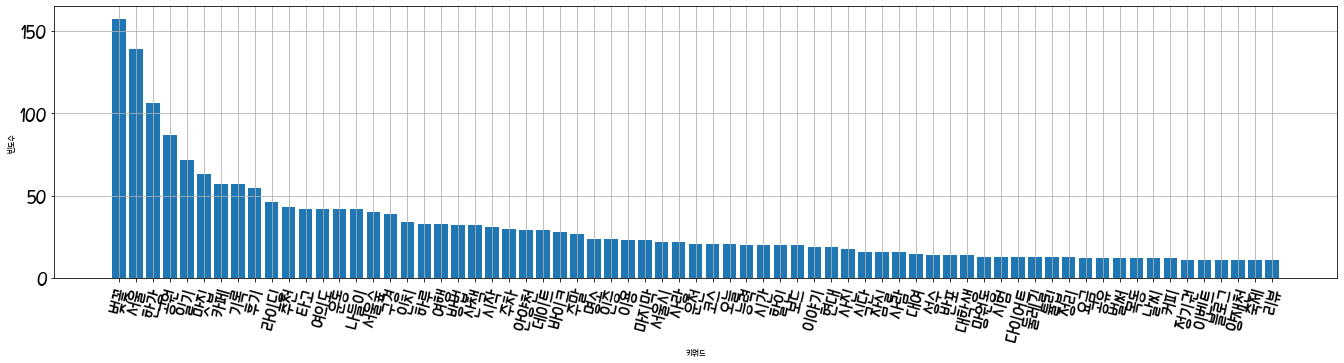

In [110]:
from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(23,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

# 워드클라우드 
___

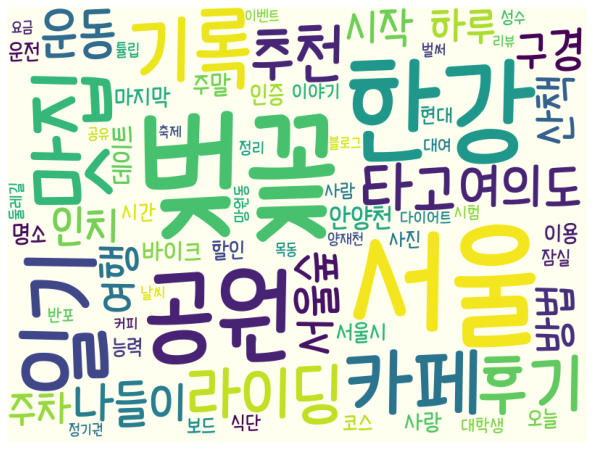

In [111]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(15,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 워드클라우드 png저장
wc.to_file('data/wordcloud.png')